# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weatherlist={}

for index in range(0,len(cities)):
    city=cities[index]
    print (f'processing record |{city}')
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'   

    response=requests.get(url)

    if response.status_code==200:

        weather_data=response.json()

        city_weather=[
            city,
            weather_data['clouds']['all'],
            weather_data['sys']['country'],
            weather_data['dt'],
            weather_data['main']['humidity'],
            weather_data['coord']['lat'],
            weather_data['coord']['lon'],
            weather_data['main']['temp_max'],
            weather_data['wind']['speed']
        ]
        
        weatherlist[index]=city_weather
    else:
        print('city not found. skipping')
print('------------------------------------------------------------')
print('data retrieval complete')
print('------------------------------------------------------------')

processing record |lebanon
processing record |thompson
processing record |qaanaaq
processing record |tilichiki
processing record |zhangjiakou
processing record |salalah
processing record |bluff
processing record |boa vista
processing record |coahuayana
processing record |hermanus
processing record |sukhobezvodnoye
processing record |buraydah
processing record |busselton
processing record |cayenne
processing record |kapaa
processing record |albany
processing record |illoqqortoormiut
city not found. skipping
processing record |sola
processing record |chuy
processing record |guerrero negro
processing record |nikolskoye
processing record |los llanos de aridane
processing record |rikitea
processing record |bandarbeyla
processing record |eureka
processing record |cascais
processing record |barentsburg
city not found. skipping
processing record |georgetown
processing record |vardo
processing record |cairns
processing record |taolanaro
city not found. skipping
processing record |mount gambier


processing record |trincomalee
processing record |chililabombwe
processing record |basoko
processing record |palmer
processing record |kerki
city not found. skipping
processing record |neuquen
processing record |salvador
processing record |srednekolymsk
processing record |terbuny
processing record |magadi
processing record |shangrao
processing record |rudnogorsk
processing record |tabiauea
city not found. skipping
processing record |aykhal
processing record |pueblo nuevo
processing record |pucara
processing record |kavieng
processing record |cabo san lucas
processing record |thinadhoo
processing record |tarata
processing record |rio grande
processing record |caravelas
processing record |kresttsy
processing record |norman wells
processing record |launceston
processing record |pangai
processing record |burnie
processing record |sira
processing record |jujuy
city not found. skipping
processing record |noumea
processing record |sucre
processing record |baykit
processing record |ternate
pro

processing record |severo-yeniseyskiy
processing record |tabialan
city not found. skipping
processing record |verkhnevilyuysk
processing record |juneau
processing record |louisbourg
city not found. skipping
processing record |damara
processing record |ixtapa
processing record |coihaique
processing record |ames
processing record |gisborne
processing record |belmonte
processing record |nelson
processing record |fortuna
processing record |aksarka
processing record |imbituba
processing record |laureles
processing record |victoria falls
processing record |loiza
processing record |nicoya
processing record |acajutla
processing record |alofi
processing record |acapulco
processing record |formoso do araguaia
city not found. skipping
processing record |acopiara
processing record |nanortalik
processing record |ondangwa
processing record |fort nelson
processing record |oktyabrskiy
processing record |ewa beach
processing record |kushima
processing record |sault sainte marie
processing record |pisco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df=pd.DataFrame.from_dict(weatherlist,orient='index',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file, ",",header=True,columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'],index=True,index_label='City_ID')
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lebanon,20,US,1603474547,61,36.21,-86.29,80.60,12.75
1,thompson,90,CA,1603474610,73,55.74,-97.86,21.20,10.29
2,qaanaaq,100,GL,1603474610,94,77.48,-69.36,19.80,9.53
3,tilichiki,0,RU,1603474610,97,60.47,166.10,29.73,5.97
4,zhangjiakou,0,CN,1603474611,59,40.81,114.88,39.78,2.71
...,...,...,...,...,...,...,...,...,...
603,caibarien,75,CU,1603474715,74,22.52,-79.47,84.20,9.17
604,grindavik,75,IS,1603474715,93,63.84,-22.43,42.80,20.80
605,diamantino,40,BR,1603474715,36,-14.41,-56.45,95.00,4.68
606,booue,100,GA,1603474716,92,-0.09,11.94,74.71,3.11


In [12]:
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,55.289753,1.603475e+09,71.913428,18.844558,18.154664,62.032527,8.228004
std,36.786408,9.026737e+01,21.193702,33.250653,90.710036,21.751347,5.834941
min,0.000000,1.603474e+09,1.000000,-54.800000,-179.170000,-2.200000,0.360000
25%,20.000000,1.603475e+09,63.000000,-8.922500,-60.657500,47.145000,4.230000
50%,68.500000,1.603475e+09,76.000000,20.970000,22.625000,69.090000,6.930000
75%,90.000000,1.603475e+09,87.000000,46.512500,102.330000,78.750000,11.135000
max,100.000000,1.603475e+09,100.000000,78.220000,179.320000,101.660000,48.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

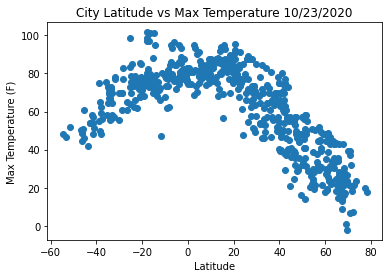

In [15]:
x=df['Lat']
y=df['Max Temp']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature 10/23/2020')
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression